In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
pd.set_option('display.width', 200)
pd.set_option('precision', 4)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

In [2]:
def get_nullframe(dataset):
    null_sum = dataset.isnull().sum()[dataset.isnull().sum()>0] 
    return pd.DataFrame({'feature':null_sum.index,'count':null_sum.values,
                          'null_percent':(null_sum.values/dataset.shape[0])*100}).sort_values(by=['count'],ascending=False)

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [5]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    plt.figure()
    plt.title("Validation Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [6]:
def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)
    plt.show()

In [7]:
def test_classifier(model,X,y,cv):
    clf = model.fit(X,y.values.ravel())
    result = clf.score(X,y.values)
    print ("Accuracy: {0:.3f}".format(result*100.0))

    train_sizes, train_scores, validation_scores = learning_curve(clf, X,y.values.ravel(),cv=cv)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    return clf,result

In [8]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [9]:
train_original=train.copy()
test_original=test.copy()

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.6873
N    0.3127
Name: Loan_Status, dtype: float64

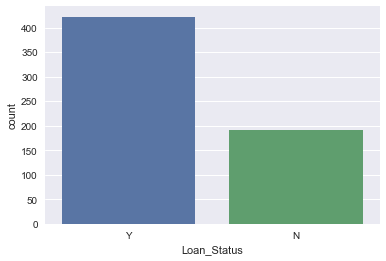

In [12]:
ax = sns.countplot(x="Loan_Status", data=train)

In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
continuous_ds = train.select_dtypes(np.number)
continuous_columns = continuous_ds.columns.values.tolist()
continuous_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
categorical_ds = train.select_dtypes("object")
categorical_columns = categorical_ds.columns.values.tolist()
ordinal_columns =['Dependents','Education','Property_Area']
categorical_columns = [ column for column in categorical_columns if column not in ordinal_columns ]
categorical_columns.remove('Loan_ID')

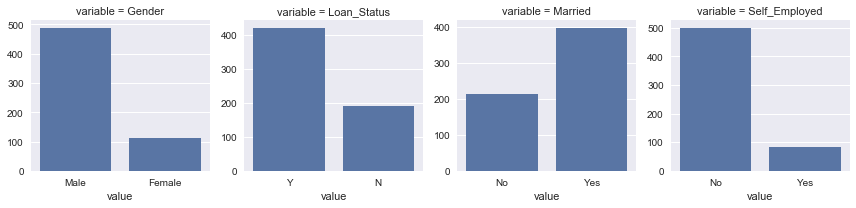

In [16]:
f = pd.melt(train, value_vars=sorted(categorical_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')

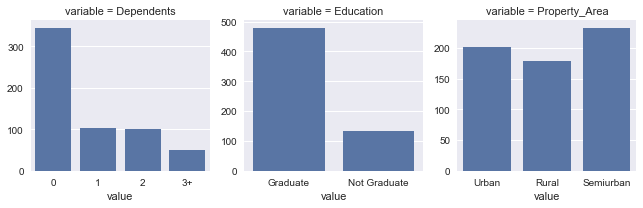

In [17]:
f = pd.melt(train, value_vars=sorted(ordinal_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')

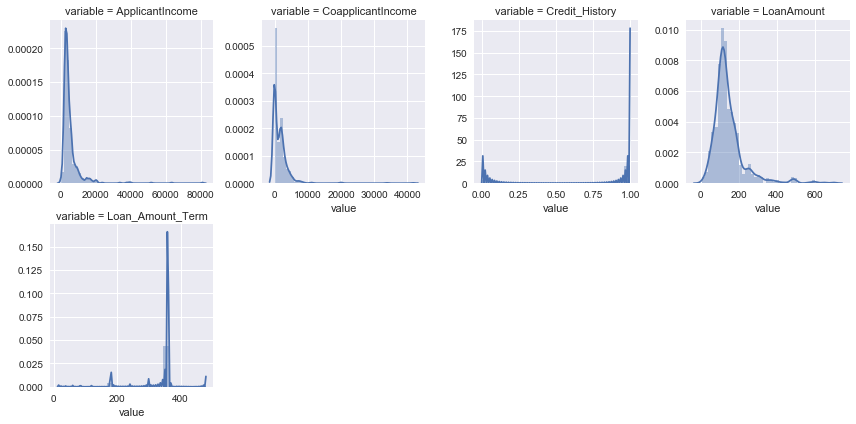

In [18]:
f = pd.melt(train, value_vars=sorted(continuous_ds))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

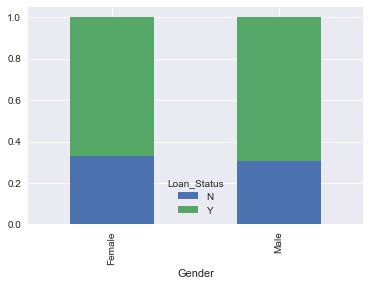

In [19]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [20]:
train.groupby(['Gender','Credit_History','Loan_Status'])['Loan_ID'].count().reindex()

Gender  Credit_History  Loan_Status
Female  0.0             N               16
                        Y                1
        1.0             N               20
                        Y               64
Male    0.0             N               63
                        Y                6
        1.0             N               75
                        Y              307
Name: Loan_ID, dtype: int64

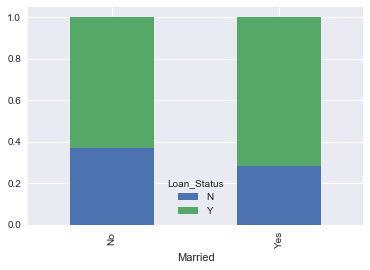

In [21]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [22]:
train.groupby(['Married','Credit_History','Loan_Status'])['Loan_ID'].count().reindex()

Married  Credit_History  Loan_Status
No       0.0             N               29
                         Y                3
         1.0             N               45
                         Y              122
Yes      0.0             N               53
                         Y                4
         1.0             N               52
                         Y              253
Name: Loan_ID, dtype: int64

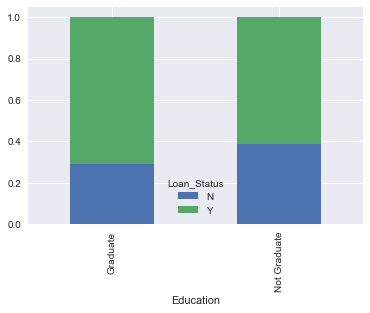

In [23]:
education=pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [24]:
train.groupby(['Education','Credit_History','Loan_Status'])['Loan_ID'].count().reindex()

Education     Credit_History  Loan_Status
Graduate      0.0             N               57
                              Y                6
              1.0             N               73
                              Y              307
Not Graduate  0.0             N               25
                              Y                1
              1.0             N               24
                              Y               71
Name: Loan_ID, dtype: int64

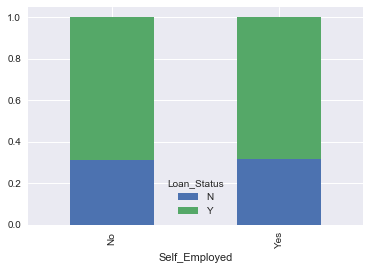

In [25]:
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [26]:
train.groupby(['Education','Self_Employed','Credit_History','Loan_Status'])['Loan_ID'].count().reindex()

Education     Self_Employed  Credit_History  Loan_Status
Graduate      No             0.0             N               46
                                             Y                6
                             1.0             N               62
                                             Y              249
              Yes            0.0             N               10
                             1.0             N                9
                                             Y               41
Not Graduate  No             0.0             N               23
                                             Y                1
                             1.0             N               19
                                             Y               57
              Yes            0.0             N                2
                             1.0             N                4
                                             Y                9
Name: Loan_ID, dtype: int64

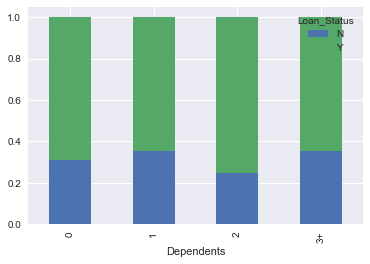

In [27]:
#Credit_History
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [28]:
train.groupby(['Dependents','Credit_History','Loan_Status'])['Loan_ID'].count().reindex()

Dependents  Credit_History  Loan_Status
0           0.0             N               42
                            Y                3
            1.0             N               60
                            Y              211
1           0.0             N               13
                            Y                1
            1.0             N               17
                            Y               59
2           0.0             N               13
                            Y                1
            1.0             N               12
                            Y               69
3+          0.0             N                9
                            Y                2
            1.0             N                7
                            Y               30
Name: Loan_ID, dtype: int64

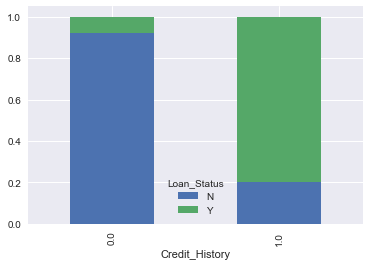

In [29]:
#Credit_History
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

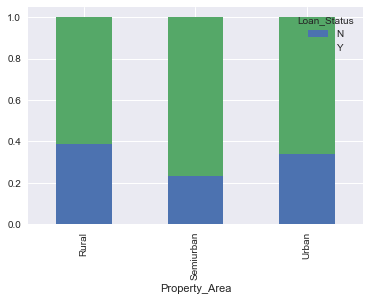

In [30]:
PropertyArea=pd.crosstab(train['Property_Area'],train['Loan_Status'])
PropertyArea.div(PropertyArea.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

In [31]:
train.groupby(['Property_Area','Loan_Status'])['Loan_ID'].count().reindex()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_ID, dtype: int64

In [32]:
test[ (test['Credit_History'].notnull()) &(test['Dependents']!='0')]['Credit_History'].value_counts()

1.0    127
0.0     26
Name: Credit_History, dtype: int64

In [33]:
Credit_History_Married=pd.crosstab(train['Credit_History'],train['Married'],train['Loan_Status'],margins=True, aggfunc='count')
Credit_History_Married

Married,No,Yes,All
Credit_History,,,
0.0,32,57,89
1.0,167,305,472
All,199,362,561


In [34]:
train_null =get_nullframe(train)
train_null

,feature,count,null_percent
6,Credit_History,50,8.1433
3,Self_Employed,32,5.2117
4,LoanAmount,22,3.5831
2,Dependents,15,2.4430
5,Loan_Amount_Term,14,2.2801
0,Gender,13,2.1173
1,Married,3,0.4886


In [35]:
test_null =get_nullframe(test)
test_null

,feature,count,null_percent
5,Credit_History,29,7.9019
2,Self_Employed,23,6.2670
0,Gender,11,2.9973
1,Dependents,10,2.7248
4,Loan_Amount_Term,6,1.6349
3,LoanAmount,5,1.3624


In [36]:
#train_credit_null_index = train[(train['Married']=='Yes') &
#                                (train['CoapplicantIncome']!=0) 
#                                &(train['Credit_History'].isnull())].index.tolist()
#test_credit_null_index=test[(test['Married']=='Yes') & 
#                            (test['CoapplicantIncome']!=0) &
#                            (test['Credit_History'].isnull())].index.tolist()

#train.loc[train_credit_null_index,'Credit_History']=1
#test.loc[test_credit_null_index,'Credit_History']=1

train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

train_Married_null_index = train[ 
                                (train['CoapplicantIncome']!=0) 
                                &(train['Married'].isnull())].index.tolist()

train.loc[train_Married_null_index,'Married']='Yes'
train['Married'].fillna('No',inplace=True)

In [37]:
train_null =get_nullframe(train)
train_null

,feature,count,null_percent
0,LoanAmount,22,3.5831


In [38]:
test_null =get_nullframe(test)
test_null

,feature,count,null_percent
0,LoanAmount,5,1.3624


In [39]:
def emi_calculator(row): 
    r = 9.5 / (12 * 100) # one month interest 
    return (row['LoanAmount']*1000 * r * pow(1 + r, row['Loan_Amount_Term'])) / (pow(1 + r, row['Loan_Amount_Term']) - 1) 
 

In [40]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)
full_dataset =pd.concat(objs=[train, test], axis=0,sort =True).reset_index(drop=True) 
table = full_dataset.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
full_dataset['LoanAmount'].fillna(full_dataset[full_dataset['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [41]:
property_map = {'Rural':1,'Urban':2,'Semiurban':3}
full_dataset['TotalIncome'] =  full_dataset['ApplicantIncome']+ full_dataset['CoapplicantIncome']
full_dataset['HasCoApplicant'] = full_dataset['CoapplicantIncome'].apply(lambda x: "Y" if x > 0 else "N")
full_dataset['EMI'] = full_dataset.apply(emi_calculator,axis=1)
full_dataset['Balance_Income']= full_dataset['TotalIncome']-(full_dataset['EMI']) +1
full_dataset['Married'] = (full_dataset['Married']=='Yes') * 1
full_dataset['Gender'] = (full_dataset['Gender']=='Male') * 1
full_dataset['Property_Area'] = full_dataset['Property_Area'].map(property_map)
full_dataset['LoanAmount']= full_dataset['LoanAmount']
full_dataset['Loan_Amount_Term']= full_dataset['Loan_Amount_Term']/12
full_dataset['Credit_History']  = full_dataset['Credit_History'].astype(str)
full_dataset["Graduate_with_GoodCreditHistory"] = ((full_dataset["Education"] == "Graduate")& (full_dataset['Credit_History']=='1.0')) * 1
full_dataset["Graduate_with_BadCreditHistory"] = ((full_dataset["Education"] == "Graduate")& (full_dataset['Credit_History'] =='0.0')) * 1
full_dataset["NotGraduate_with_GoodCreditHistory"] = ((full_dataset["Education"] == "Not Graduate")& (full_dataset['Credit_History']=='1.0')) * 1
full_dataset["NotGraduate_with_BadCreditHistory"] = ((full_dataset["Education"] == "Not Graduate")& (full_dataset['Credit_History'] =='0.0')) * 1
#full_dataset["Married_CoApplicant_NoDependents"] = ((full_dataset["Married"] == 1) & 
#                                                    (full_dataset['Dependents'] =='0')&
#                                                    (full_dataset['HasCoApplicant']=='Y')
#
#) * 1
full_dataset['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)


In [42]:
full_dataset["Married_NoDependents"] = ((full_dataset["Married"] == 1) & (full_dataset['Dependents'] ==0)) * 1
full_dataset["Married_WithDependents"] = ((full_dataset["Married"] == 1) & (full_dataset['Dependents'] !=0)) * 1
full_dataset["NotMarried_NoDependents"] = ((full_dataset["Married"] == 0) & (full_dataset['Dependents'] ==0)) * 1
full_dataset["NotMarried_WithDependents"] = ((full_dataset["Married"] == 0) & (full_dataset['Dependents'] !=0)) * 1
full_dataset.head()


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome,HasCoApplicant,EMI,Balance_Income,Graduate_with_GoodCreditHistory,Graduate_with_BadCreditHistory,NotGraduate_with_GoodCreditHistory,NotGraduate_with_BadCreditHistory,Married_NoDependents,Married_WithDependents,NotMarried_NoDependents,NotMarried_WithDependents
0,5849,0.0,1.0,0,Graduate,1,130.0,30.0,LP001002,1.0,0,2,No,5849.0,N,1093.1105,4756.8895,1,0,0,0,0,0,1,0
1,4583,1508.0,1.0,1,Graduate,1,128.0,30.0,LP001003,0.0,1,1,No,6091.0,Y,1076.2934,5015.7066,1,0,0,0,0,1,0,0
2,3000,0.0,1.0,0,Graduate,1,66.0,30.0,LP001005,1.0,1,2,Yes,3000.0,N,554.9638,2446.0362,1,0,0,0,1,0,0,0
3,2583,2358.0,1.0,0,Not Graduate,1,120.0,30.0,LP001006,1.0,1,2,No,4941.0,Y,1009.0250,3932.9750,0,0,1,0,1,0,0,0
4,6000,0.0,1.0,0,Graduate,1,141.0,30.0,LP001008,1.0,0,2,No,6000.0,N,1185.6044,4815.3956,1,0,0,0,0,0,1,0


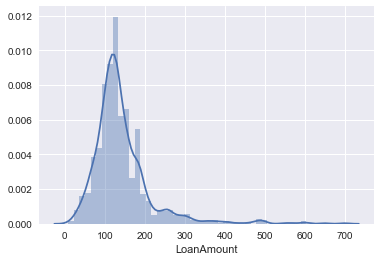

In [43]:
sns.distplot(full_dataset['LoanAmount'])

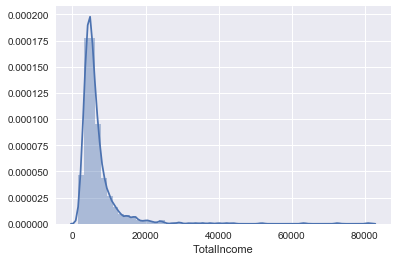

In [44]:
sns.distplot(full_dataset['TotalIncome'])

In [45]:
cat_list = [column for column in  full_dataset.columns if column not in full_dataset.describe(include=[np.number]).columns.values.tolist()]
cat_list.remove('Loan_ID') 

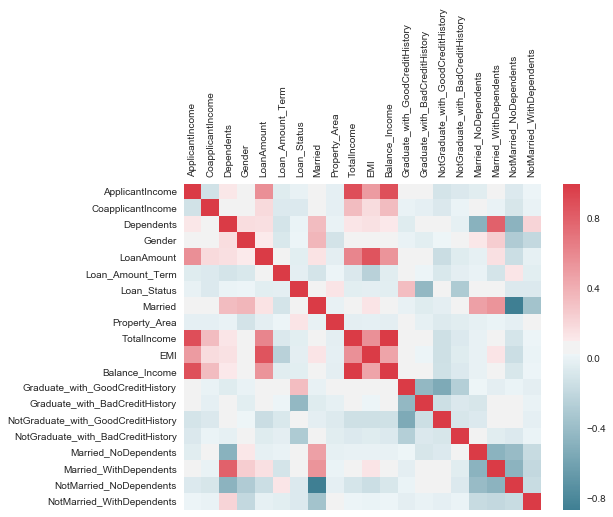

In [46]:
correlation = full_dataset[full_dataset['Loan_Status'].notnull()][full_dataset.describe(include=[np.number]).columns.values.tolist()].corr()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, 
           xticklabels=correlation.columns.values,
           yticklabels=correlation.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

#correlation = correlation.sort_values('Loan_Status', ascending=False)
#plt.figure(figsize=(8,10))
#sns.barplot( correlation['Loan_Status'][1:], correlation.index[1:], orient='h')
#plt.show()

In [47]:
Checkpoint

NameError: name 'Checkpoint' is not defined

In [48]:
train_Id  = full_dataset[full_dataset['Loan_Status'].notnull()]["Loan_ID"]
test_Id = full_dataset[full_dataset['Loan_Status'].isnull()]["Loan_ID"]
full_dataset.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Education',
                   'Loan_Amount_Term','Married'],axis=1,inplace=True)

In [49]:
full_dataset = pd.get_dummies(full_dataset, prefix_sep='_', drop_first=False)

In [50]:
from datatools.customtransformers import StdScaleTransformer,RobustScaleTransformer,MinMaxTransformer,LogTransformer
scaler = StdScaleTransformer(['TotalIncome','EMI','Balance_Income'])
full_dataset =scaler.fit_transform(full_dataset)

In [51]:
null_dataset =get_nullframe(full_dataset)
null_dataset

,feature,count,null_percent
0,Loan_Status,367,37.4108


In [52]:
train_X = full_dataset[full_dataset['Loan_Status'].notnull()] 
test_X = full_dataset[full_dataset['Loan_Status'].isnull()]  
train_y= full_dataset[full_dataset['Loan_Status'].notnull()]['Loan_Status']
train_X.drop(['Loan_Status'],axis=1,inplace=True)
test_X.drop(['Loan_Status'],axis=1,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
print(train_X.shape)
print(test_X.shape)
test_size = 0.25
seed = 42
X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_X, train_y, test_size=test_size,random_state=seed)

(614, 22)
(367, 22)


In [54]:
X_trainmodel.head()

,Dependents,Gender,LoanAmount,Property_Area,TotalIncome,EMI,Balance_Income,Graduate_with_GoodCreditHistory,Graduate_with_BadCreditHistory,NotGraduate_with_GoodCreditHistory,NotGraduate_with_BadCreditHistory,Married_NoDependents,Married_WithDependents,NotMarried_NoDependents,NotMarried_WithDependents,Credit_History_-1.0,Credit_History_0.0,Credit_History_1.0,Self_Employed_No,Self_Employed_Yes,HasCoApplicant_N,HasCoApplicant_Y
92,2,1,81.0,2,-0.2805,-0.5372,-0.1909,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
304,0,1,140.0,1,-0.0468,-0.0931,-0.0312,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1
68,3,1,125.0,2,0.0529,1.2033,-0.1799,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0
15,0,1,125.0,2,-0.3042,-0.2060,-0.2808,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
211,3,1,128.0,3,-0.3491,-0.1834,-0.3326,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1


In [55]:
from sklearn.linear_model import LogisticRegression
logrmodel = LogisticRegression()
logrmodel.fit(X_trainmodel, y_trainmodel.values.ravel())
result = logrmodel.score(X_val, y_val)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 77.273


Accuracy: 82.391


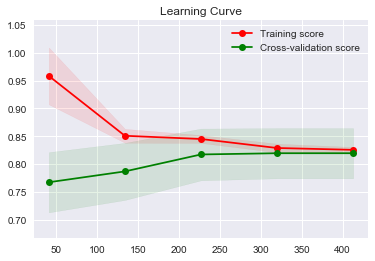

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [56]:
kfold = StratifiedKFold(n_splits=10)
logrmodel ,result = test_classifier(logrmodel,X_trainmodel,y_trainmodel,kfold)
print(logrmodel)

In [57]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 6, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logrmodel, hyperparameters, cv=5, verbose=0,scoring='accuracy')
best_model = clf.fit(X_trainmodel, y_trainmodel.values.ravel())
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


Accuracy: 82.174


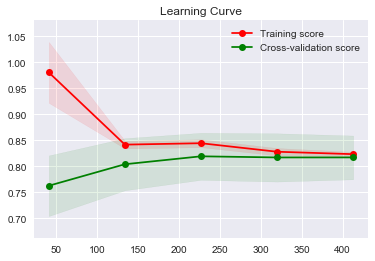

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 4.64159e+00, 2.15443e+01, 1.00000e+02, 4.64159e+02,
       2.15443e+03, 1.00000e+04, 4.64159e+04, 2.15443e+05, 1.00000e+06]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [58]:
best_lr_model ,result = test_classifier(best_model,X_trainmodel,y_trainmodel,kfold)
print(best_lr_model)

In [59]:
y_pred=measure_performance(X_val,y_val,best_lr_model, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

        0.0       0.91      0.39      0.55        54
        1.0       0.75      0.98      0.85       100

avg / total       0.81      0.77      0.74       154

Confusion matrix
[[21 33]
 [ 2 98]]


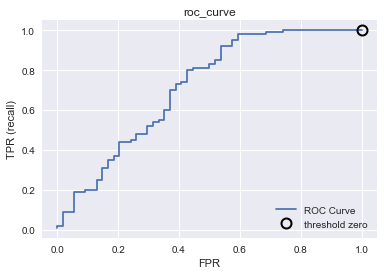

In [60]:
plot_roc(X_val,y_val,best_lr_model)

In [61]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
## Search grid for optimal parameters
parameter_grid = {
                 'max_depth' : [3,5],
                 'n_estimators': [200],
                 'max_features': [10],
                 'min_samples_split': [3,5,8],
                 'min_samples_leaf': [3,7,10]
                  #"oob_score":[True]
                  #"class_weight":[{0: 0.61616, 1: 0.38384}]
                 }

rfcg =RandomForestClassifier()
grid_search = GridSearchCV(rfcg,param_grid = parameter_grid,verbose = 1,n_jobs =-1,cv=kfold,scoring='accuracy')
grid_search.fit(X_trainmodel ,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   55.0s finished


Accuracy: 84.130


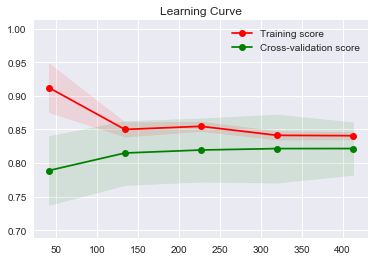

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [62]:
best_model ,result = test_classifier(rfc_best,X_trainmodel,y_trainmodel,kfold)
print(best_model)

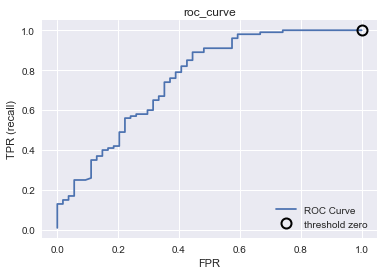

In [63]:
plot_roc(X_val,y_val,best_model)

In [64]:
y_pred=measure_performance(X_val,y_val,best_model, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

        0.0       0.85      0.41      0.55        54
        1.0       0.75      0.96      0.84       100

avg / total       0.78      0.77      0.74       154

Confusion matrix
[[22 32]
 [ 4 96]]


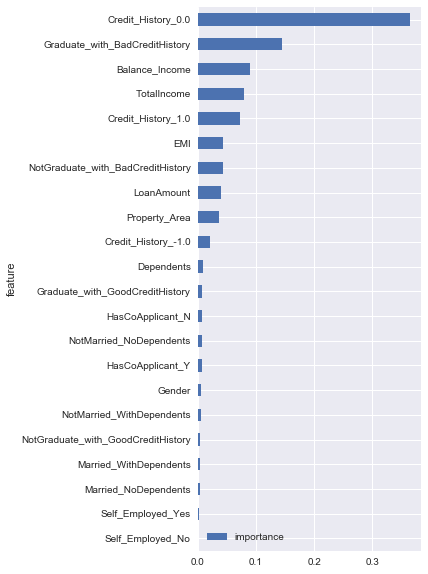

In [65]:
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = best_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(4, 10))

In [66]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(best_model, prefit=True)
reduced_train= model.transform(X_trainmodel)
reduced_validation =model.transform(X_val)
reduced_test =model.transform(test_X)
#X_trainmodel =reduced_train
#X_val =reduced_validation
#test_dataset =reduced_test
print(reduced_train.shape)
print(reduced_validation.shape)
print(reduced_test.shape)

(460, 5)
(154, 5)
(367, 5)


In [67]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
parameter_grid = {
                 'max_depth' : [3,4,7, 11],
                 'n_estimators': [50, 100],
                 'max_features': [5],
                 "min_samples_split": [2,3,5],
                 "min_samples_leaf": [1,3,5],
                 
                 'bootstrap': [True, False],
                  "criterion": ["gini"],
                  #"oob_score":[True]
                  #"class_weight":[{0: 0.61616, 1: 0.38384}]
                 }

rfcg =RandomForestClassifier()
grid_search = GridSearchCV(rfcg,param_grid = parameter_grid,verbose = 1,n_jobs =-1,cv=kfold,)

grid_search.fit(reduced_train ,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.2min finished


Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.83
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


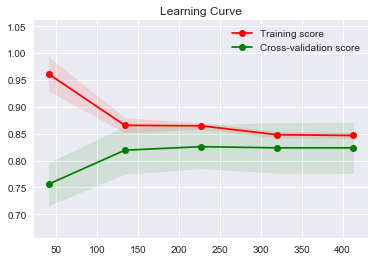

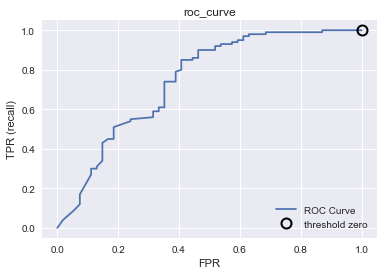

Classification report
             precision    recall  f1-score   support

        0.0       0.81      0.39      0.53        54
        1.0       0.74      0.95      0.83       100

avg / total       0.77      0.75      0.73       154

Confusion matrix
[[21 33]
 [ 5 95]]


In [69]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
# Train the new classifier on the new dataset containing the most important features
rfc_best.fit(reduced_train, y_trainmodel.values.ravel())
train_sizes, train_scores, validation_scores = learning_curve(rfc_best, reduced_train,y_trainmodel.values.ravel(),cv=kfold)
plot_learning_curve(train_sizes, train_scores, validation_scores)

plot_roc(reduced_validation,y_val,rfc_best)

y_pred=measure_performance(reduced_validation,y_val,rfc_best, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

In [70]:
def evaluvate_model(clf ,X_trainmodel, y_trainmodel,X_val,y_val): 
    clf.fit(X_trainmodel, y_trainmodel.values.ravel())
    train_sizes, train_scores, validation_scores = learning_curve(clf, 
                                                                  X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    plot_roc(X_val,y_val,clf)
    y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                               show_classification_report=True,
                               show_confusion_matrix=True, show_r2_score=False)



Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   59.2s
[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:  1.3min finished


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=7)


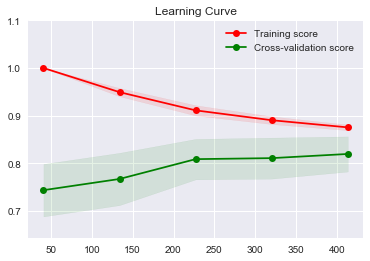

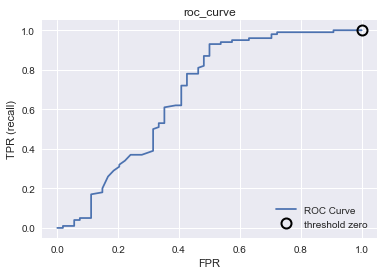

Classification report
             precision    recall  f1-score   support

        0.0       0.80      0.44      0.57        54
        1.0       0.76      0.94      0.84       100

avg / total       0.77      0.77      0.75       154

Confusion matrix
[[24 30]
 [ 6 94]]


In [71]:
dtc = DecisionTreeClassifier( class_weight=None, criterion='gini',
            max_depth=6, max_features='auto',
            max_leaf_nodes=None,min_samples_leaf=1,
            min_samples_split=2
            )

ada_dtc = AdaBoostClassifier(dtc, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[100],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsada_dtc = GridSearchCV(ada_dtc,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsada_dtc.fit(reduced_train, y_trainmodel.values.ravel())

ada_best = gsada_dtc.best_estimator_
print(ada_best)
evaluvate_model(ada_best,reduced_train, y_trainmodel,reduced_validation,y_val)


In [ ]:
test_y = best_model.predict(test_X)
submission =pd.DataFrame({'Loan_ID':test_Id.values ,'Loan_Status':test_y}) 
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
import datetime
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_rf"+timestamp+"_out.csv"

In [ ]:
submission.to_csv(filename)